Homework 3 Nishchay Patel

Libraries :

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score


1. Data Processing

In [2]:
data = load_breast_cancer()
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df_features, df_target], axis =1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state=43, test_size=0.2)

In [4]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.1426,0.21870,0.116400,0.08263,0.3075,0.07351
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.425100,0.19410,0.2818,0.10050
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.029250,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.26490,0.377900,0.09594,0.2471,0.07463
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.15060,0.176400,0.08235,0.3024,0.06949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
277,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.96,24.30,129.00,1236.0,0.1243,0.11600,0.221000,0.12940,0.2567,0.05737
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,...,16.39,22.07,108.10,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957


We can use Standard Scaler as it will being the mean of the column to 0 and standar deviation to 1

In [5]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [6]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

2. Model Building

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='f1', cv=5)
grid_dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5)
grid_knn.fit(X_train, y_train)

Without Hypertuning:

In [16]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "K-Nearest Neighbors": knn
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("\n")

/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Decision Tree Results:
Accuracy: 0.9385964912280702
F1 Score: 0.9523809523809523
Precision: 0.9722222222222222
Recall: 0.9333333333333333


Random Forest Results:
Accuracy: 0.9824561403508771
F1 Score: 0.9868421052631579
Precision: 0.974025974025974
Recall: 1.0


K-Nearest Neighbors Results:
Accuracy: 0.9736842105263158
F1 Score: 0.9801324503311258
Precision: 0.9736842105263158
Recall: 0.9866666666666667




/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


I choose to use F-1 score, since we might have some biase in the data collection. The F-1 score helps to properly evaludate the model without a bias in data.

In [8]:
print("Best parameters for Decision Tree:", grid_dt.best_params_)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for K-Nearest Neighbors:", grid_knn.best_params_)


Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


 3. Model Evaluation

In [10]:
best_dt = DecisionTreeClassifier(**grid_dt.best_params_)
best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)
f1_decision_tree = f1_score(y_test, y_pred)
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", auc_score)

Accuracy: 0.9649122807017544
F1 Score: 0.972972972972973
Precision: 0.9863013698630136
Recall: 0.96
AUC: 0.9637606837606838


In [11]:
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
f1_random_forest = f1_score(y_test, y_pred)
y_prob = best_rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", auc_score)

/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9824561403508771
F1 Score: 0.9866666666666667
Precision: 0.9866666666666667
Recall: 0.9866666666666667
AUC: 0.9776068376068376


In [12]:
best_knn = KNeighborsClassifier(**grid_knn.best_params_)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)
f1_knn = f1_score(y_test, y_pred)
y_prob = best_knn.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", auc_score)

Accuracy: 0.9736842105263158
F1 Score: 0.9801324503311258
Precision: 0.9736842105263158
Recall: 0.9866666666666667
AUC: 0.9830769230769231


/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


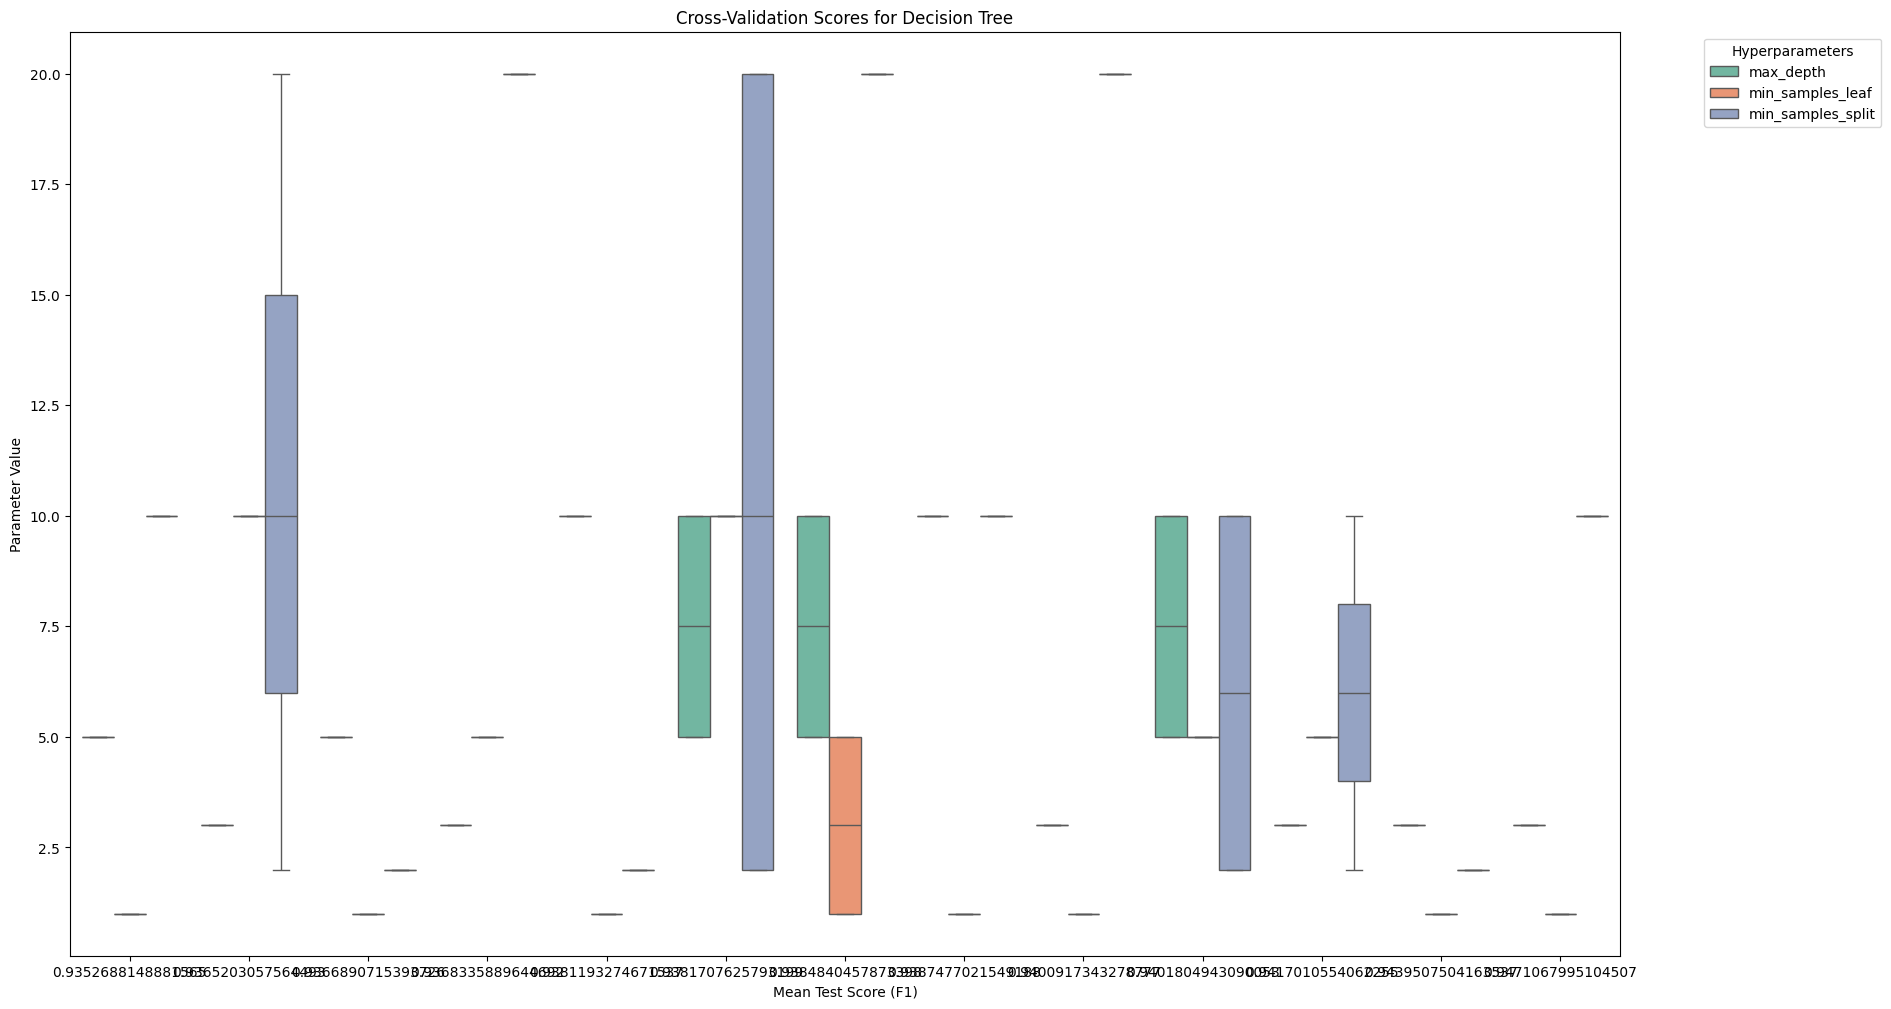

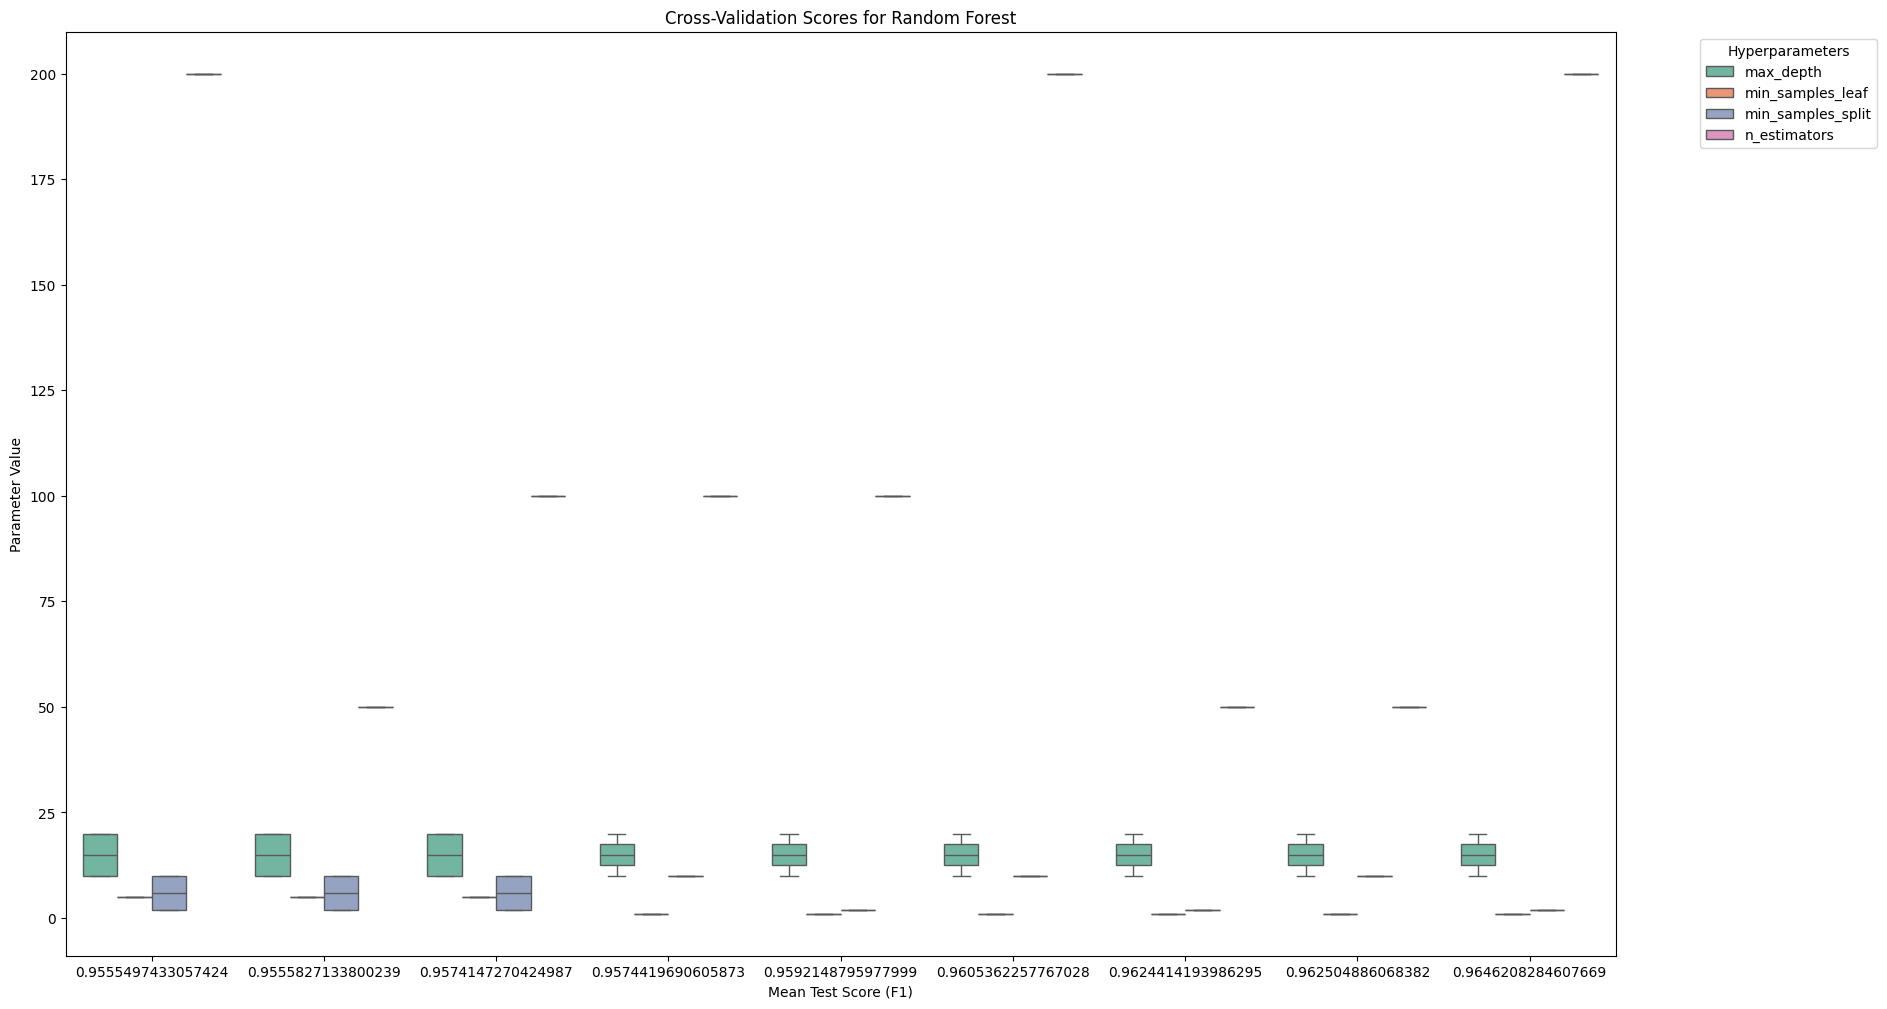

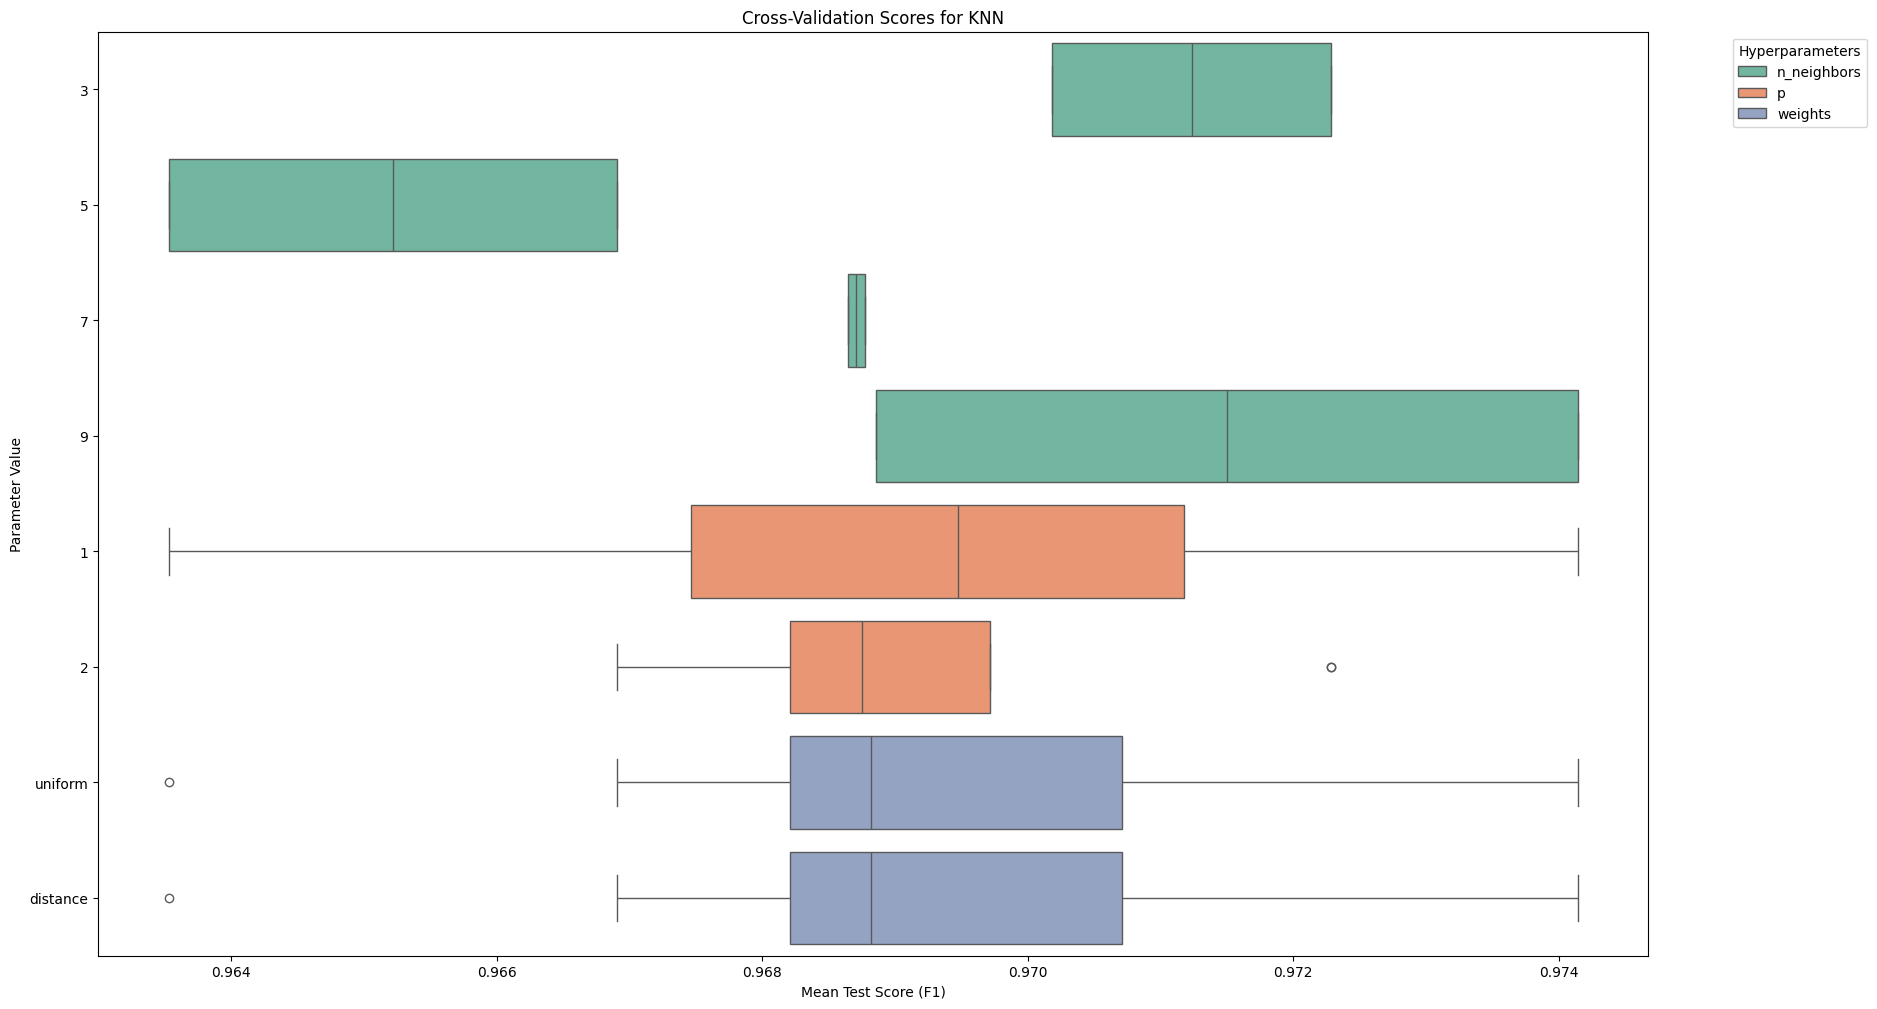

In [14]:
def plot_boxplots(cv_results, model_name):
    results_df = pd.DataFrame(cv_results)

    params_df = pd.json_normalize(results_df['params'])
    
    plot_df = pd.concat([results_df['mean_test_score'], params_df], axis=1)

    plot_df = plot_df.melt(id_vars='mean_test_score', var_name='Parameter', value_name='Value')

    plt.figure(figsize=(20, 12))
    sns.boxplot(data=plot_df, x='mean_test_score', y='Value', hue='Parameter', palette='Set2')
    plt.title(f'Cross-Validation Scores for {model_name}')
    plt.xlabel('Mean Test Score (F1)')
    plt.ylabel('Parameter Value')
    plt.legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_boxplots(grid_dt.cv_results_, "Decision Tree")
plot_boxplots(grid_rf.cv_results_, "Random Forest")
plot_boxplots(grid_knn.cv_results_, "KNN")


4. ROC Curve

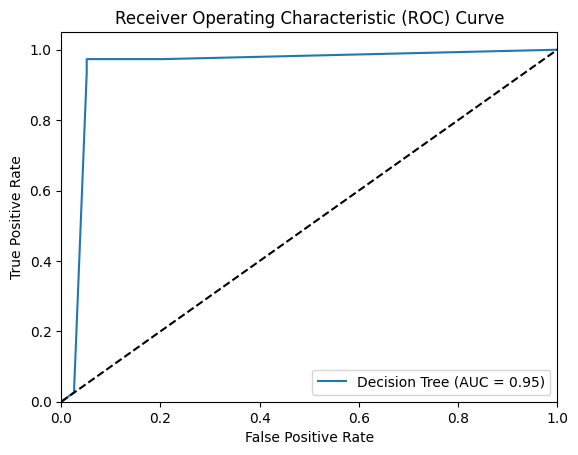

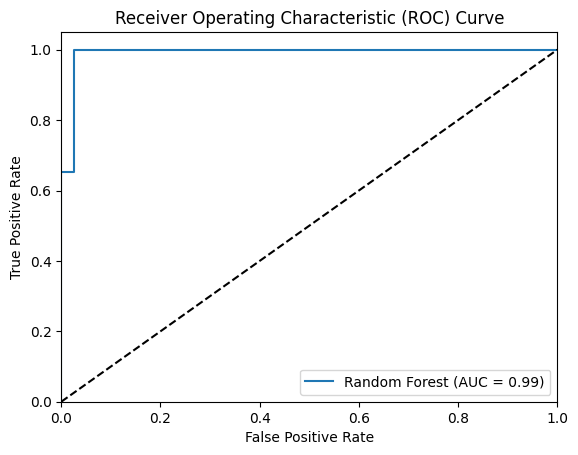

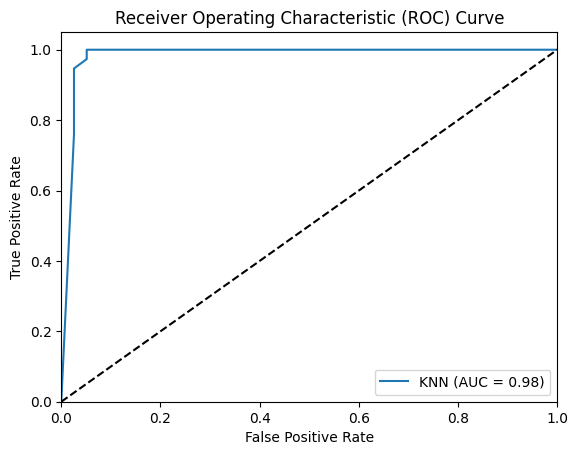

In [15]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(grid_dt.best_estimator_, X_test, y_test, "Decision Tree")
plot_roc_curve(grid_rf.best_estimator_, X_test, y_test, "Random Forest")
plot_roc_curve(grid_knn.best_estimator_, X_test, y_test, "KNN")


5. Model Selection

In [77]:
best_model = max(f1_decision_tree, f1_knn, f1_random_forest)
best_model

np.float64(0.9933774834437086)

BEST MODEL = RandomForestClassifier